In [2]:
from torchvision import datasets

train_set = datasets.MNIST('./', train=True, download=True)
test_set = datasets.MNIST('./', train=False, download=True)

train_set_arr = train_set.data.numpy()
test_set_arr = test_set.data.numpy()
train_targets_arr = train_set.targets.numpy()
test_targets_arr = test_set.targets.numpy()

train_set_arr = train_set_arr.reshape((train_set_arr.shape[0], train_set_arr.shape[1] * train_set_arr.shape[2]))
test_set_arr = test_set_arr.reshape((test_set_arr.shape[0], test_set_arr.shape[1] * test_set_arr.shape[2]))

import random
sampled_indices = random.sample(range(train_set_arr.shape[0]), k=6000)
sampled_train_set_arr = train_set_arr[sampled_indices]
sampled_train_targets_arr = train_targets_arr[sampled_indices]

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
sampled_train_set_arr = pca.fit_transform(X=sampled_train_set_arr)
sampled_test_set_arr = pca.transform(X=test_set_arr)
print("The number of training samples: {}. The dimension of training samples: {}".format(sampled_train_set_arr.shape[0], sampled_train_set_arr.shape[1]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
The number of training samples: 6000. The dimension of training samples: 100


**1. Perform K-means clustering using an appropriate value for K, where the clusters are initialized from random data from the dataset. Discuss how you selected the appropriate value for K.**

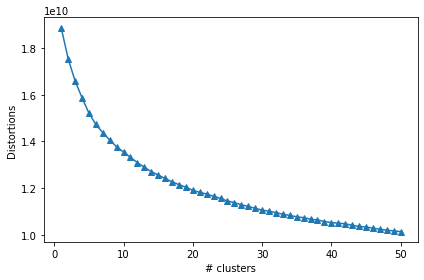

In [4]:
from sklearn.cluster import KMeans
n_cluster_candiates_num = 50
distortions = []
for i in range(1, n_cluster_candiates_num + 1):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X=sampled_train_set_arr)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, n_cluster_candiates_num + 1), distortions, marker='^')
plt.xlabel('# clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

**K choice**

Based on the above figure, the best K is 14 using elbow method.

**2. For the appropriate value of K that was selected, display the cluster centroids. Discuss the similarities and differences between the centroids, and how they relate to the labels of the data, if at all.**

K: 14. The dimension of centroids: 100


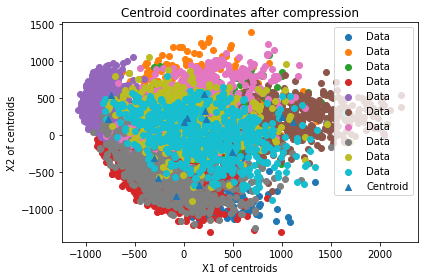

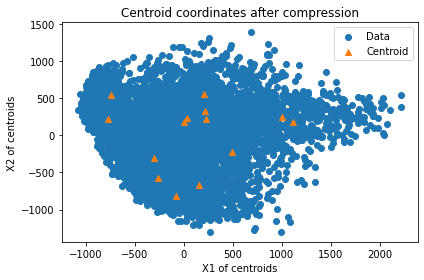

In [6]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=14, init='random', n_init=10, max_iter=300, random_state=0)
kmeans1.fit(X=sampled_train_set_arr)
centroids1 = kmeans1.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroids1.shape[0], centroids1.shape[1]))

from sklearn.decomposition import PCA
pca_centroid = PCA(n_components=2)
dimred_sampled_train_set_arr = pca_centroid.fit_transform(X=sampled_train_set_arr)
dimred_sampled_train_set_arr_dict = {}
for i, label in enumerate(sampled_train_targets_arr):
  if label not in dimred_sampled_train_set_arr_dict:
    dimred_sampled_train_set_arr_dict[label] = []
  dimred_sampled_train_set_arr_dict[label].append(dimred_sampled_train_set_arr[i])
  
import numpy as np
import matplotlib.pyplot as plt
dimred_centroids1 = pca_centroid.transform(X=centroids1)

for label in dimred_sampled_train_set_arr_dict:
  dimred_sampled_train_set_arr_dict[label] = np.array(dimred_sampled_train_set_arr_dict[label])
  plt.scatter(dimred_sampled_train_set_arr_dict[label][:, 0], dimred_sampled_train_set_arr_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

plt.scatter(dimred_sampled_train_set_arr[:, 0], dimred_sampled_train_set_arr[:,1], marker='o', label='Data')
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()



We can see in above two figures, the triangles are the centroids. The centorids in outer range of the scatters can match better with the clusters. The centroids in inner range have worse matching. The data in the inner range have more similarities than those in the outer range, making the centorids in the outer range match better than those in the inner range.

**3. Repeat the above, using k-means++ initialization**

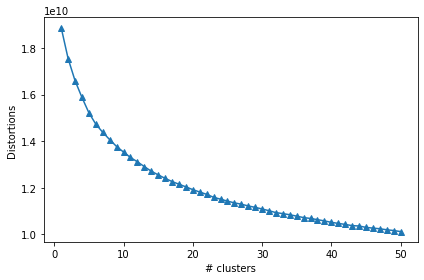

In [7]:
from sklearn.cluster import KMeans
n_cluster_candiates_num = 50
distortions = []
for i in range(1, n_cluster_candiates_num + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X=sampled_train_set_arr)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, n_cluster_candiates_num + 1), distortions, marker='^')
plt.xlabel('# clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

Based on the above figure, the best K is 12 using elbow method.

K: 12. The dimension of centroids: 100


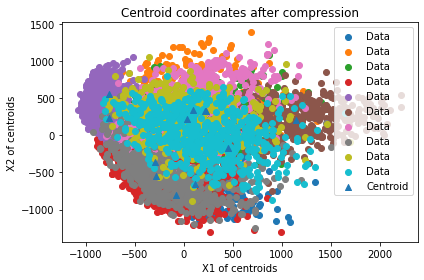

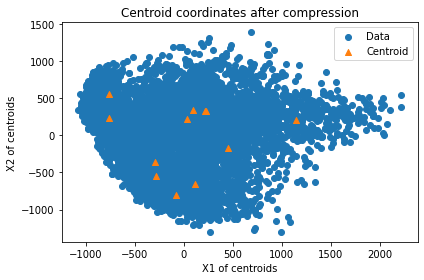

In [8]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans2.fit(X=sampled_train_set_arr)
centroids2 = kmeans2.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroids2.shape[0], centroids2.shape[1]))

import matplotlib.pyplot as plt
dimred_centroids2 = pca_centroid.transform(X=centroids2)

for label in dimred_sampled_train_set_arr_dict:
  dimred_sampled_train_set_arr_dict[label] = np.array(dimred_sampled_train_set_arr_dict[label])
  plt.scatter(dimred_sampled_train_set_arr_dict[label][:, 0], dimred_sampled_train_set_arr_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

plt.scatter(dimred_sampled_train_set_arr[:, 0], dimred_sampled_train_set_arr[:,1], marker='o', label='Data')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centroid')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()





we can see in above two figures that the triangles are the centroids. The centorids in outer range of the scatters can match better with the clusters. The centroids in inner range have the worse matching. The data in the inner range are more similar than those in the outer range, making the centorids in the outer range match better than those in the inner range.

**4. Now assume that you have labeled information. Randomly choose 1 sample from each of the classes to serve as the initial cluster centers. Run the K-means algorithm. Display the final and initial cluster centroids. Compare and contrast the initial cluster centers to the final cluster centers. Do they still represent the labels?**

In [10]:
import random
import numpy as np
labels_dict = {}
for i, label in enumerate(sampled_train_targets_arr):
  if label not in labels_dict:
    labels_dict[label] = []
  labels_dict[label].append(i)

sampled_label_index = np.zeros((len(labels_dict), sampled_train_set_arr.shape[-1]))
for j, _label in enumerate(labels_dict.keys()):
  rand_index = random.sample(labels_dict[_label], k=1)
  sampled_label_index[j] = sampled_train_set_arr[rand_index]

In [11]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=10, init=sampled_label_index, n_init=10, max_iter=300, random_state=0)
kmeans3.fit(X=sampled_train_set_arr)
centroids3 = kmeans3.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


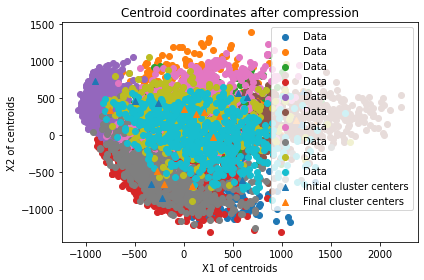

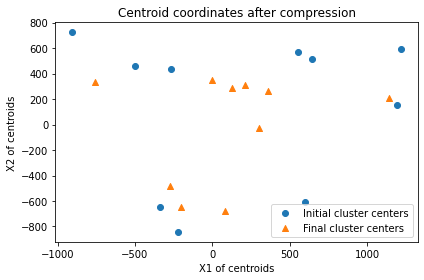

In [17]:
import matplotlib.pyplot as plt
dimred_centroids3 = pca_centroid.transform(X=centroids3)
dimred_sampled_label_index = pca_centroid.transform(X=sampled_label_index)
for label in dimred_sampled_train_set_arr_dict:
  dimred_sampled_train_set_arr_dict[label] = np.array(dimred_sampled_train_set_arr_dict[label])
  plt.scatter(dimred_sampled_train_set_arr_dict[label][:, 0], dimred_sampled_train_set_arr_dict[label][:,1], marker='o', label='Data')
plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='^', label='Initial cluster centers')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='o', label='Initial cluster centers')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers')
plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

**Discussion**

We can see for some centroids, the initial centers are close to the final centers, while some are not. For the centers which are not close, they would not go too far away from the initial centers.

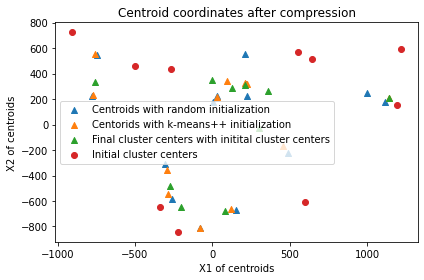

In [18]:
import matplotlib.pyplot as plt
dimred_centroids3 = pca_centroid.transform(X=centroids3)
dimred_sampled_label_index = pca_centroid.transform(X=sampled_label_index)
plt.scatter(dimred_centroids1[:, 0], dimred_centroids1[:,1], marker='^', label='Centroids with random initialization')
plt.scatter(dimred_centroids2[:, 0], dimred_centroids2[:,1], marker='^', label='Centorids with k-means++ initialization')
plt.scatter(dimred_centroids3[:, 0], dimred_centroids3[:,1], marker='^', label='Final cluster centers with initital cluster centers')
plt.scatter(dimred_sampled_label_index[:, 0], dimred_sampled_label_index[:,1], marker='o', label='Initial cluster centers')

plt.title('Centroid coordinates after compression')
plt.xlabel('X1 of centroids')
plt.ylabel('X2 of centroids')
plt.tight_layout()
plt.legend()
plt.show()

**6. Compute the variance (as shown in class) for each of the three approaches. How do they compare?**

In [20]:
import numpy as np
results1 = kmeans1.predict(X=sampled_train_set_arr)
results2 = kmeans2.predict(X=sampled_train_set_arr)
results3 = kmeans3.predict(X=sampled_train_set_arr)
variance1 = 0
for i, label in enumerate(results1):
  variance1 += np.linalg.norm(x=(sampled_train_set_arr[i] - centroids1[label]))
variance2 = 0
for i, label in enumerate(results2):
  variance2 += np.linalg.norm(x=(sampled_train_set_arr[i] - centroids2[label]))
variance3 = 0
for i, label in enumerate(results3):
  variance3 += np.linalg.norm(x=(sampled_train_set_arr[i] - centroids3[label]))
print("Variance for Test with random initialization: {}\nVariance for Test with k-means++ initialization: {}\nVariance for Test with label information: {}".format(variance1, variance2, variance3))

Variance for Test with random initialization: 8570538.308456354
Variance for Test with k-means++ initialization: 8698170.571910914
Variance for Test with label information: 8923061.669349186


**Discussion**

The variance with random initialization is smallar than the variance with k-means++ inititalization which is smallar than the variance with label information. The difference is influences the differences in the numbers of clusters. The smallest variance which is the variance with random initialization has the most centroids and clusters which makes the variance smaller. 